In [1]:
import pandas as pd
import torch
import tensorqtl
import numpy as np
import seaborn as sns
from tensorqtl import genotypeio, cis, trans
from sklearn.preprocessing import quantile_transform
print(f'PyTorch {torch.__version__}')
print(f'Pandas {pd.__version__}')

/home/jpopp/.conda/envs/tensorqtl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch 1.13.0
Pandas 2.0.2


In [19]:
all_donors = 

In [22]:
donor_sample = np.random.choice(list(np.unique(pr.fam['iid'])), size=53, replace=False)

In [24]:
donor_sample

array(['GTEX-ZGAY', 'GTEX-1GN1U', 'GTEX-1LVAN', 'GTEX-YFC4', 'GTEX-1EWIQ',
       'GTEX-13PL7', 'GTEX-PX3G', 'GTEX-11XUK', 'GTEX-13QIC', 'GTEX-T6MO',
       'GTEX-XUZC', 'GTEX-14AS3', 'GTEX-15ER7', 'GTEX-1CAMS', 'GTEX-WRHU',
       'GTEX-12ZZX', 'GTEX-1GMR8', 'GTEX-14BMU', 'GTEX-1QP28',
       'GTEX-1QCLZ', 'GTEX-ZC5H', 'GTEX-1F48J', 'GTEX-Y8LW', 'GTEX-15SDE',
       'GTEX-ZVT2', 'GTEX-S4P3', 'GTEX-17JCI', 'GTEX-13OVI', 'GTEX-11P81',
       'GTEX-T2IS', 'GTEX-ZAK1', 'GTEX-ZTPG', 'GTEX-ZYY3', 'GTEX-P78B',
       'GTEX-1JN76', 'GTEX-TML8', 'GTEX-NPJ7', 'GTEX-1F5PL', 'GTEX-17F9Y',
       'GTEX-WYVS', 'GTEX-13U4I', 'GTEX-11VI4', 'GTEX-14PN3', 'GTEX-XV7Q',
       'GTEX-1NUQO', 'GTEX-OHPL', 'GTEX-Q734', 'GTEX-12WSD', 'GTEX-UJHI',
       'GTEX-11EMC', 'GTEX-11EM3', 'GTEX-ZE7O', 'GTEX-1MCYP'],
      dtype='<U10')

In [25]:
ix = [pr.sample_ids.index(i) for i in donor_sample]
pr.fam = pr.fam.loc[ix]
pr.bed = pr.bed[:,ix]
pr.sample_ids = pr.fam['iid'].tolist()

In [26]:
pr.load_genotypes()

iid,GTEX-ZGAY,GTEX-1GN1U,GTEX-1LVAN,GTEX-YFC4,GTEX-1EWIQ,GTEX-13PL7,GTEX-PX3G,GTEX-11XUK,GTEX-13QIC,GTEX-T6MO,...,GTEX-XV7Q,GTEX-1NUQO,GTEX-OHPL,GTEX-Q734,GTEX-12WSD,GTEX-UJHI,GTEX-11EMC,GTEX-11EM3,GTEX-ZE7O,GTEX-1MCYP
snp,,,,,,,,,,,,,,,,,,,,,
chr1_9919625_C_T_b38,1,2,1,2,2,2,2,1,2,2,...,2,2,2,2,0,2,2,2,2,1
chr1_9932244_A_C_b38,1,2,1,2,2,2,2,1,2,2,...,2,2,2,2,0,2,2,2,2,1
chr1_9934281_A_G_b38,1,2,1,2,2,2,2,1,2,2,...,2,2,2,2,0,2,2,2,2,1
chr1_9940342_T_A_b38,1,2,1,2,2,2,2,1,2,2,...,2,2,2,2,0,2,2,2,2,1
chr1_9944824_C_T_b38,2,2,2,2,2,2,2,1,2,2,...,2,2,2,2,0,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr20_14358157_G_T_b38,1,2,2,1,1,2,1,2,2,1,...,2,2,1,1,0,1,2,1,1,1
chr20_14360685_A_T_b38,1,2,2,1,1,2,1,2,2,1,...,2,2,1,1,0,1,2,1,1,1
chr22_36992814_G_A_b38,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,2,0,0,0,-1,0


In [12]:
np.random.choice(genotype_df.columns.tolist(), size=53, replace=False)

array(['GTEX-QCQG', 'GTEX-TSE9', 'GTEX-ZE7O', 'GTEX-1I4MK', 'GTEX-S7SF',
       'GTEX-T2IS', 'GTEX-13OVI', 'GTEX-RWS6', 'GTEX-Y114', 'GTEX-1QPFJ',
       'GTEX-14DAQ', 'GTEX-11GSP', 'GTEX-113JC', 'GTEX-XV7Q',
       'GTEX-11P81', 'GTEX-14H4A', 'GTEX-1ICG6', 'GTEX-Q734',
       'GTEX-14PJ6', 'GTEX-ZVT2', 'GTEX-18A7A', 'GTEX-18D9A', 'GTEX-ZP4G',
       'GTEX-S4UY', 'GTEX-12WSD', 'GTEX-1EWIQ', 'GTEX-ZC5H', 'GTEX-XUZC',
       'GTEX-17F9Y', 'GTEX-11I78', 'GTEX-15SB6', 'GTEX-11TTK',
       'GTEX-ZVT3', 'GTEX-P4PP', 'GTEX-1LVAN', 'GTEX-17JCI', 'GTEX-X15G',
       'GTEX-147F3', 'GTEX-11VI4', 'GTEX-PWN1', 'GTEX-ZYVF', 'GTEX-1LGOU',
       'GTEX-1GN1U', 'GTEX-ZTPG', 'GTEX-11EM3', 'GTEX-13D11',
       'GTEX-1MCYP', 'GTEX-14PJM', 'GTEX-13PL7', 'GTEX-QDT8', 'GTEX-NPJ7',
       'GTEX-1399U', 'GTEX-1NUQO'], dtype='<U10')

In [27]:
expression_bed = "/home/jpopp/scratch16-abattle4/lab_data/GTEx_v8/ciseQTL/GTEx_Analysis_v8_eQTL_expression_matrices/Vagina.v8.normalized_expression.bed.gz"
covariates_file = "/home/jpopp/scratch16-abattle4/lab_data/GTEx_v8/ciseQTL/GTEx_Analysis_v8_eQTL_covariates/Vagina.v8.covariates.txt"
harmonized_tests = "../../results/static_eqtl_followup/eb_cellid/pseudobulk_tmm/basic/8pcs/eb_gtex_harmonized_tests.txt"
plink_prefix_path = "../../data/trans_qtl_calling/gtex/genotypes_filtered/plink.Vagina.GOBP_TISSUE_DEVELOPMENT"
npcs = 8

In [3]:
# PLINK reader for genotypes
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
variant_df = pr.bim.set_index('snp')[['chrom', 'pos']]

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 56.82it/s]


In [4]:
donor_sample = np.random.choice(genotype_df.columns.tolist(), size=53, replace=False)

In [6]:
list(donor_sample)

['GTEX-1JMQL',
 'GTEX-U3ZN',
 'GTEX-P78B',
 'GTEX-1JN1M',
 'GTEX-PWCY',
 'GTEX-11GSP',
 'GTEX-13W3W',
 'GTEX-1MCYP',
 'GTEX-14PJ6',
 'GTEX-RWS6',
 'GTEX-ZTPG',
 'GTEX-131YS',
 'GTEX-15UF6',
 'GTEX-1GF9U',
 'GTEX-14H4A',
 'GTEX-ZQG8',
 'GTEX-18A7A',
 'GTEX-1C475',
 'GTEX-183WM',
 'GTEX-ZE7O',
 'GTEX-12WSD',
 'GTEX-147F3',
 'GTEX-S4UY',
 'GTEX-1JN76',
 'GTEX-TML8',
 'GTEX-11DXX',
 'GTEX-17JCI',
 'GTEX-QVJO',
 'GTEX-131XG',
 'GTEX-15SHU',
 'GTEX-1R9JW',
 'GTEX-1GN1W',
 'GTEX-WRHU',
 'GTEX-146FH',
 'GTEX-17F9Y',
 'GTEX-11I78',
 'GTEX-SE5C',
 'GTEX-1GN1U',
 'GTEX-OHPL',
 'GTEX-14DAQ',
 'GTEX-113JC',
 'GTEX-ZLWG',
 'GTEX-1I4MK',
 'GTEX-PX3G',
 'GTEX-15SB6',
 'GTEX-Q734',
 'GTEX-1LVAN',
 'GTEX-QCQG',
 'GTEX-11XUK',
 'GTEX-N7MT',
 'GTEX-X8HC',
 'GTEX-W5WG',
 'GTEX-1EWIQ']

In [18]:
genotype_df = genotype_df.loc[:, donor_sample]

iid,GTEX-16NGA,GTEX-11XUK,GTEX-14BMU,GTEX-1JN76,GTEX-S4UY,GTEX-W5WG,GTEX-P4PP,GTEX-YJ8O,GTEX-ZP4G,GTEX-XV7Q,...,GTEX-QCQG,GTEX-T2IS,GTEX-1AMFI,GTEX-PWCY,GTEX-1S5ZU,GTEX-UJHI,GTEX-131YS,GTEX-YFC4,GTEX-15ER7,GTEX-WYVS
snp,,,,,,,,,,,,,,,,,,,,,
chr1_9919625_C_T_b38,1,1,2,2,2,2,2,2,2,2,...,2,1,2,2,2,2,2,2,2,2
chr1_9932244_A_C_b38,1,1,2,2,2,2,2,2,2,2,...,2,1,2,2,2,2,2,2,2,-1
chr1_9934281_A_G_b38,1,1,2,2,2,2,2,2,2,2,...,2,1,2,2,2,2,2,2,2,2
chr1_9940342_T_A_b38,1,1,2,2,2,2,2,2,2,2,...,2,1,2,2,2,2,2,2,2,2
chr1_9944824_C_T_b38,1,1,2,2,2,2,2,2,2,2,...,2,1,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr20_14358157_G_T_b38,1,2,2,1,2,2,1,1,1,2,...,1,1,2,2,2,1,2,1,1,2
chr20_14360685_A_T_b38,1,2,2,1,2,2,1,1,1,2,...,1,1,2,2,2,1,2,1,1,2
chr22_36992814_G_A_b38,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
donor_sample_loc = "../../results/subset_qtl_calling/permutations/8pcs/Artery_Aorta.donor_sample.tsv"

In [34]:
with open(donor_sample_loc, "r") as file:
    donor_sample = file.readlines()
donor_sample = [s.strip() for s in donor_sample]


In [35]:
donor_sample

['GTEX-ZDXO',
 'GTEX-YJ8O',
 'GTEX-1QW4Y',
 'GTEX-133LE',
 'GTEX-11UD2',
 'GTEX-1B8L1',
 'GTEX-WFON',
 'GTEX-P78B',
 'GTEX-12WSN',
 'GTEX-13113',
 'GTEX-132QS',
 'GTEX-145MO',
 'GTEX-15DYW',
 'GTEX-1CB4J',
 'GTEX-13FTZ',
 'GTEX-1F75I',
 'GTEX-XYKS',
 'GTEX-P4PQ',
 'GTEX-15UF6',
 'GTEX-1F48J',
 'GTEX-1212Z',
 'GTEX-18A66',
 'GTEX-PW2O',
 'GTEX-T5JC',
 'GTEX-QV31',
 'GTEX-1AX9I',
 'GTEX-1GZHY',
 'GTEX-13W3W',
 'GTEX-UPK5',
 'GTEX-1C2JI',
 'GTEX-1GMR2',
 'GTEX-1C6VQ',
 'GTEX-QLQ7',
 'GTEX-OXRL',
 'GTEX-ZVT2',
 'GTEX-S32W',
 'GTEX-13CF3',
 'GTEX-V955',
 'GTEX-1R9PO',
 'GTEX-QESD',
 'GTEX-U3ZM',
 'GTEX-1QPFJ',
 'GTEX-1F88F',
 'GTEX-1EWIQ',
 'GTEX-S33H',
 'GTEX-1A3MV',
 'GTEX-S95S',
 'GTEX-131YS',
 'GTEX-13OVG',
 'GTEX-15SHU',
 'GTEX-QCQG',
 'GTEX-1I6K7',
 'GTEX-1399R']

In [28]:
phenotype_df, phenotype_pos_df = tensorqtl.read_phenotype_bed(expression_bed)

In [29]:
phenotype_df.index = phenotype_df.index.str.split('.').str[0]
phenotype_pos_df.index = phenotype_df.index.str.split('.').str[0]

In [32]:
phenotype_df.columns.tolist()

['GTEX-1117F',
 'GTEX-113JC',
 'GTEX-11DXX',
 'GTEX-11EM3',
 'GTEX-11EMC',
 'GTEX-11GSP',
 'GTEX-11I78',
 'GTEX-11P81',
 'GTEX-11TTK',
 'GTEX-11VI4',
 'GTEX-11XUK',
 'GTEX-12WSD',
 'GTEX-12WSJ',
 'GTEX-12ZZX',
 'GTEX-131XG',
 'GTEX-131YS',
 'GTEX-1399S',
 'GTEX-1399U',
 'GTEX-13D11',
 'GTEX-13N11',
 'GTEX-13OVI',
 'GTEX-13PL7',
 'GTEX-13PVR',
 'GTEX-13QBU',
 'GTEX-13QIC',
 'GTEX-13U4I',
 'GTEX-13W3W',
 'GTEX-146FH',
 'GTEX-146FR',
 'GTEX-147F3',
 'GTEX-14AS3',
 'GTEX-14BMU',
 'GTEX-14DAQ',
 'GTEX-14H4A',
 'GTEX-14JG6',
 'GTEX-14PJ6',
 'GTEX-14PJM',
 'GTEX-14PKU',
 'GTEX-14PN3',
 'GTEX-15DYW',
 'GTEX-15ER7',
 'GTEX-15SB6',
 'GTEX-15SDE',
 'GTEX-15SHU',
 'GTEX-15UF6',
 'GTEX-16NGA',
 'GTEX-16NPV',
 'GTEX-17F9Y',
 'GTEX-17JCI',
 'GTEX-183WM',
 'GTEX-18A7A',
 'GTEX-18D9A',
 'GTEX-1A8FM',
 'GTEX-1AMFI',
 'GTEX-1C475',
 'GTEX-1CAMS',
 'GTEX-1EWIQ',
 'GTEX-1F48J',
 'GTEX-1F5PL',
 'GTEX-1GF9U',
 'GTEX-1GMR8',
 'GTEX-1GN1U',
 'GTEX-1GN1W',
 'GTEX-1I4MK',
 'GTEX-1ICG6',
 'GTEX-1JMQL',
 'GTEX-1JN

Filter to genes that were also tested in EBs

In [33]:
all_tests = pd.read_csv(harmonized_tests, sep="\t")

In [35]:
eb_genes = np.unique(all_tests['phenotype_id_ensg'])

In [47]:
len(eb_genes)

13686

In [46]:
phenotype_df.index.intersection(eb_genes)

Index(['ENSG00000187634', 'ENSG00000188976', 'ENSG00000187961',
       'ENSG00000187583', 'ENSG00000188290', 'ENSG00000187608',
       'ENSG00000188157', 'ENSG00000131591', 'ENSG00000162571',
       'ENSG00000078808',
       ...
       'ENSG00000100258', 'ENSG00000025770', 'ENSG00000025708',
       'ENSG00000177989', 'ENSG00000205560', 'ENSG00000008735',
       'ENSG00000100288', 'ENSG00000100299', 'ENSG00000251322',
       'ENSG00000079974'],
      dtype='object', name='gene_id', length=13289)

In [49]:
phenotype_df = phenotype_df.loc[phenotype_df.index.intersection(eb_genes), donor_sample]
phenotype_pos_df = phenotype_pos_df.loc[phenotype_df.index.intersection(eb_genes), :]

In [51]:
phenotype_pos_df

,chr,tss
gene_id,,
ENSG00000187634,chr1,923928
ENSG00000188976,chr1,959309
ENSG00000187961,chr1,960587
ENSG00000187583,chr1,966497
ENSG00000188290,chr1,1000172
...,...,...
ENSG00000008735,chr22,50600685
ENSG00000100288,chr22,50601455
ENSG00000100299,chr22,50628173


Mapping files:   0%|          | 0/3 [16:06<?, ?it/s]


<Axes: xlabel='ENSG00000227232.5', ylabel='Count'>

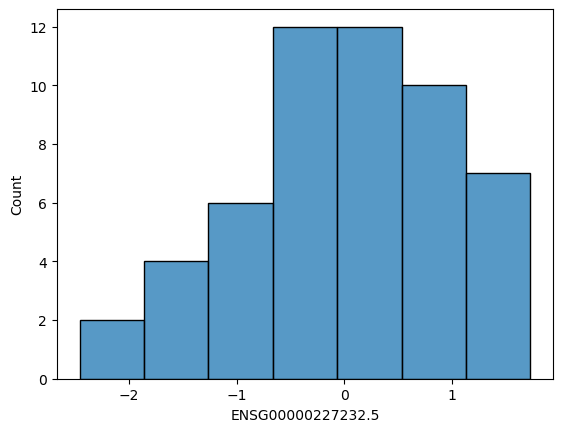

In [30]:
sns.histplot(phenotype_df.loc["ENSG00000227232.5", :])

In [25]:
covariates_df = pd.read_csv(covariates_file, sep='\t', index_col=0, nrows=int(npcs)+5).T

In [26]:
covariates_df.loc[donor_sample, :]

ID,PC1,PC2,PC3,PC4,PC5,InferredCov1,InferredCov2,InferredCov3,InferredCov4,InferredCov5,InferredCov6,InferredCov7,InferredCov8
GTEX-16NGA,-0.0761,-0.0096,0.0146,0.0073,0.0152,-0.058241,-0.012773,-0.020126,0.040970,-0.001786,0.006147,0.032777,0.062135
GTEX-11XUK,0.0150,-0.0078,0.0276,0.0170,0.0219,-0.055976,-0.022125,-0.019126,-0.008353,0.036433,0.017672,0.030920,0.037191
GTEX-14BMU,0.0137,-0.0061,0.0049,-0.0020,0.0141,-0.024776,-0.066832,-0.045006,0.047780,0.040025,-0.009159,0.083706,-0.079105
GTEX-1JN76,0.0154,-0.0034,0.0104,0.0008,0.0230,-0.067030,-0.014957,0.048754,0.002049,0.076155,-0.011833,-0.100032,-0.045114
GTEX-S4UY,0.0075,0.0045,-0.1435,0.0055,0.0033,0.041731,-0.065914,0.005779,-0.051578,-0.117240,0.051216,-0.049531,0.014243
GTEX-W5WG,0.0148,-0.0042,0.0069,-0.0037,0.0223,0.045554,-0.090647,0.001869,-0.013512,-0.020540,-0.030881,0.012524,0.029766
GTEX-P4PP,0.0136,-0.0046,-0.0120,0.0021,0.0307,0.020331,-0.005268,0.057778,0.049841,-0.120788,0.050216,0.037988,-0.057376
GTEX-YJ8O,0.0135,-0.0052,-0.0049,0.0077,0.0057,-0.008255,0.087856,0.040666,-0.036707,-0.067025,0.047846,0.096031,0.076867
GTEX-ZP4G,0.0155,-0.0010,0.0048,-0.0022,0.0326,-0.029424,-0.068278,0.008206,-0.062054,0.010363,-0.020943,-0.011047,0.045452
GTEX-XV7Q,0.0161,-0.0077,0.0368,-0.0004,0.0392,0.018066,-0.001925,0.041121,-0.152161,0.130225,0.052118,0.080420,-0.079570


In [11]:
!pwd

/scratch16/abattle4/jpopp/ebQTL/code/subset_qtl_calling


In [ ]:
# Sample to 53 donors


In [ ]:
# load phenotypes and covariates
phenotype_df, phenotype_pos_df = tensorqtl.read_phenotype_bed(expression_bed)
covariates_df = pd.read_csv(covariates_file, sep='\t', index_col=0, nrows=int(npcs)+1).T


cis_df = cis.map_cis(genotype_df, variant_df, 
                     phenotype_df, phenotype_pos_df,
                     covariates_df=covariates_df, 
                     window=50000,
                     seed=123456)